In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [14]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('isis', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536105081.0
2018-09-04 16:51:21
Al Qaeda trying to regain primacy as Islamic State loses ground: NATO
61
2
1535993767.0
2018-09-03 09:56:07
The Syrian Army is preparing for one final attack to end its seven-year rebellion
67
3
1535636562.0
2018-08-30 06:42:42
Russia warns U.S. against 'illegal aggression against Syria'
26
4
1535326733.0
2018-08-26 16:38:53
U.S. strike kills ISIS leader in Afghanistan
2355
5
1535080725.0
2018-08-23 20:18:45
Former Elkhart woman charged with conspiracy to provide material support to ISIS
42
6
1535054360.0
2018-08-23 12:59:20
ISIS leader al-Baghdadi appears to call for attacks on Canada in new audio recording
901
7
1535043894.0
2018-08-23 10:04:54
Paris knife attack: One killed, two seriously injured
877
8
1535003329.0
2018-08-22 22:48:49
Columbia mom charged with sex trafficking disabled daughter
108
9
1534965229.0
2018-08-22 12:13:49
Army soldier accused of wanting to help ISIS to plead guilty, lawyers say
208
10
1534562916.0
2018-08-17 20:

101
1513701293.0
2017-12-19 08:34:53
Iraqi refugee who wanted to bomb Texas malls for ISIS is sentenced
103
102
1513663659.0
2017-12-18 22:07:39
Temple University investigating racist fliers
4
103
1513641094.0
2017-12-18 15:51:34
Indian ISIS member tries to slit prison warder’s neck while chanting slogans
60
104
1513630039.0
2017-12-18 12:47:19
Army Sgt. La David T. Johnson fought to end after ambush in Niger, wasn't caught or executed: Military report
439
105
1513628744.0
2017-12-18 12:25:44
ISIS Claims Responsibility For Quetta (Pakistan) Church attacks - EurAsian Times
17
106
1513300512.0
2017-12-14 17:15:12
ISIS weapons arsenal included some purchased by U.S. government
62
107
1513125083.0
2017-12-12 16:31:23
Teen charged with trying to help ISIS had big plans: Authorities
55
108
1513115287.0
2017-12-12 13:48:07
Akayed Ullah: New York bombing suspect charged
321
109
1513057528.0
2017-12-11 21:45:28
New York Bomber Was Inspired by ISIS Christmas Attacks, Officials Say
282
110
151291

201
1505370592.0
2017-09-13 23:29:52
B-52s Are Back In The Skies Of Afghanistan Dropping Bombs Once Again
66


In [15]:
#Give name
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536105e+09,2018-09-04 16:51:21,Al Qaeda trying to regain primacy as Islamic S...,61
1,1.535994e+09,2018-09-03 09:56:07,The Syrian Army is preparing for one final att...,67
2,1.535637e+09,2018-08-30 06:42:42,Russia warns U.S. against 'illegal aggression ...,26
3,1.535327e+09,2018-08-26 16:38:53,U.S. strike kills ISIS leader in Afghanistan,2355
4,1.535081e+09,2018-08-23 20:18:45,Former Elkhart woman charged with conspiracy t...,42
5,1.535054e+09,2018-08-23 12:59:20,ISIS leader al-Baghdadi appears to call for at...,901
6,1.535044e+09,2018-08-23 10:04:54,"Paris knife attack: One killed, two seriously ...",877
7,1.535003e+09,2018-08-22 22:48:49,Columbia mom charged with sex trafficking disa...,108
8,1.534965e+09,2018-08-22 12:13:49,Army soldier accused of wanting to help ISIS t...,208
9,1.534563e+09,2018-08-17 20:28:36,'I met my IS captor on a German street',927


In [16]:
#filter out likes below 1000 

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [17]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,3,1.535327e+09,2018-08-26 16:38:53,U.S. strike kills ISIS leader in Afghanistan,2355
1,5,1.535054e+09,2018-08-23 12:59:20,ISIS leader al-Baghdadi appears to call for at...,901
2,6,1.535044e+09,2018-08-23 10:04:54,"Paris knife attack: One killed, two seriously ...",877
3,7,1.535003e+09,2018-08-22 22:48:49,Columbia mom charged with sex trafficking disa...,108
4,8,1.534965e+09,2018-08-22 12:13:49,Army soldier accused of wanting to help ISIS t...,208
5,9,1.534563e+09,2018-08-17 20:28:36,'I met my IS captor on a German street',927
6,10,1.534476e+09,2018-08-16 20:27:32,US officials: Ex-ISIS fighter entered US as re...,373
7,11,1.534405e+09,2018-08-16 00:44:09,Feds arrest suspected ISIS member in Sacrament...,1317
8,13,1.533036e+09,2018-07-31 04:24:02,Surprise ISIS attack in Syria leaves over 200 ...,85
9,15,1.532944e+09,2018-07-30 02:38:22,ISIS controls less than 70km2 of territory in ...,100


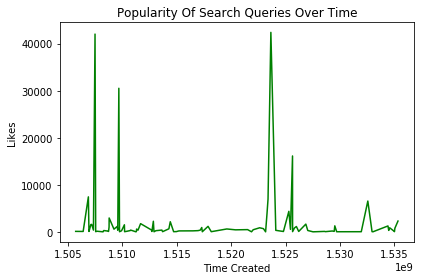

In [18]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()